In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd                        
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
warnings.simplefilter(action = 'ignore')

In [2]:
data =pd.read_csv('drug200.csv')
data.head()

In [3]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
data.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [5]:
data.describe(include="all")


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,drugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [6]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:

names= ['Age','Sex','BP','Cholesterol','Na_to_K','Drug']
names


['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']

In [9]:
enumerate(names)


In [11]:

for i,j in enumerate(names):
    print(i,j)

0 Age
1 Sex
2 BP
3 Cholesterol
4 Na_to_K
5 Drug


In [12]:
# identifying independent variables
x= data.iloc[:,:6].values
x

array([[23, 'F', 'HIGH', 'HIGH', 25.355, 'drugY'],
       [47, 'M', 'LOW', 'HIGH', 13.093, 'drugC'],
       [47, 'M', 'LOW', 'HIGH', 10.114, 'drugC'],
       ...,
       [52, 'M', 'NORMAL', 'HIGH', 9.894, 'drugX'],
       [23, 'M', 'NORMAL', 'NORMAL', 14.02, 'drugX'],
       [40, 'F', 'LOW', 'NORMAL', 11.349, 'drugX']], dtype=object)

In [13]:
#identifying dependent variables
y= data.iloc[:,3].values
y

array(['HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH',
       'HIGH', 'NORMAL', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'HIGH',
       'NORMAL', 'NORMAL', 'HIGH', 'HIGH', 'NORMAL', 'NORMAL', 'HIGH',
       'NORMAL', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'NORMAL', 'NORMAL',
       'HIGH', 'NORMAL', 'HIGH', 'NORMAL', 'NORMAL', 'HIGH', 'NORMAL',
       'NORMAL', 'NORMAL', 'NORMAL', 'HIGH', 'HIGH', 'NORMAL', 'NORMAL',
       'HIGH', 'NORMAL', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH',
       'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'HIGH', 'NORMAL', 'HIGH',
       'NORMAL', 'HIGH', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'HIGH',
       'NORMAL', 'HIGH', 'NORMAL', 'HIGH', 'NORMAL', 'HIGH', 'HIGH',
       'HIGH', 'NORMAL', 'NORMAL', 'NORMAL', 'HIGH', 'NORMAL', 'HIGH',
       'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'HIGH',
       'HIGH', 'NORMAL', 'NORMAL', 'HIGH', 'NORMAL', 'HIGH', 'NORMAL',
       'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'NORMAL', 'NORMAL', 'NORMAL'

In [14]:
# Text data need to be converted into number format 
# For Sex column
data=pd.concat([data,pd.get_dummies(data["Sex"],prefix="Gender")],axis=1)
data.drop(["Sex"],axis=1,inplace=True)
data.head() 

,Age,BP,Cholesterol,Na_to_K,Drug,Gender_F,Gender_M
0,23,HIGH,HIGH,25.355,drugY,1,0
1,47,LOW,HIGH,13.093,drugC,0,1
2,47,LOW,HIGH,10.114,drugC,0,1
3,28,NORMAL,HIGH,7.798,drugX,1,0
4,61,LOW,HIGH,18.043,drugY,1,0


In [15]:
data=pd.concat([data,pd.get_dummies(data["BP"],prefix="BP_Range")],axis=1)
data.drop(["BP"],axis=1,inplace=True)
data.head() 

,Age,Cholesterol,Na_to_K,Drug,Gender_F,Gender_M,BP_Range_HIGH,BP_Range_LOW,BP_Range_NORMAL
0,23,HIGH,25.355,drugY,1,0,1,0,0
1,47,HIGH,13.093,drugC,0,1,0,1,0
2,47,HIGH,10.114,drugC,0,1,0,1,0
3,28,HIGH,7.798,drugX,1,0,0,0,1
4,61,HIGH,18.043,drugY,1,0,0,1,0


In [16]:
data=pd.concat([data,pd.get_dummies(data["Cholesterol"],prefix="Fat_Range")],axis=1)
data.drop(["Cholesterol"],axis=1,inplace=True)
data.head() 

,Age,Na_to_K,Drug,Gender_F,Gender_M,BP_Range_HIGH,BP_Range_LOW,BP_Range_NORMAL,Fat_Range_HIGH,Fat_Range_NORMAL
0,23,25.355,drugY,1,0,1,0,0,1,0
1,47,13.093,drugC,0,1,0,1,0,1,0
2,47,10.114,drugC,0,1,0,1,0,1,0
3,28,7.798,drugX,1,0,0,0,1,1,0
4,61,18.043,drugY,1,0,0,1,0,1,0


In [17]:
drug_type = data["Drug"]
data.drop(["Drug"],axis=1,inplace=True)
data=pd.concat([data,drug_type], axis=1)

In [18]:
data.head()

,Age,Na_to_K,Gender_F,Gender_M,BP_Range_HIGH,BP_Range_LOW,BP_Range_NORMAL,Fat_Range_HIGH,Fat_Range_NORMAL,Drug
0,23,25.355,1,0,1,0,0,1,0,drugY
1,47,13.093,0,1,0,1,0,1,0,drugC
2,47,10.114,0,1,0,1,0,1,0,drugC
3,28,7.798,1,0,0,0,1,1,0,drugX
4,61,18.043,1,0,0,1,0,1,0,drugY


In [21]:
#now we scale the numerical columns of dataset ['Age', 'Na_to_K']
data["Age"]=(data["Age"]-data["Age"].mean())/(data["Age"].max()-data["Age"].min())
data["Na_to_K"]=(data["Na_to_K"]-data["Na_to_K"].mean())/(data["Na_to_K"].max()-data["Na_to_K"].min())

In [22]:
data.head()

,Age,Na_to_K,Gender_F,Gender_M,BP_Range_HIGH,BP_Range_LOW,BP_Range_NORMAL,Fat_Range_HIGH,Fat_Range_NORMAL,Drug
0,-0.361271,0.289903,1,0,1,0,0,1,0,drugY
1,0.045508,-0.093548,0,1,0,1,0,1,0,drugC
2,0.045508,-0.186706,0,1,0,1,0,1,0,drugC
3,-0.276525,-0.259131,1,0,0,0,1,1,0,drugX
4,0.282797,0.061246,1,0,0,1,0,1,0,drugY


In [23]:
X = data.iloc[:,0:-1]
Y = data.iloc[:,[-1]]

In [24]:
X

,Age,Na_to_K,Gender_F,Gender_M,BP_Range_HIGH,BP_Range_LOW,BP_Range_NORMAL,Fat_Range_HIGH,Fat_Range_NORMAL
0,-0.361271,0.289903,1,0,1,0,0,1,0
1,0.045508,-0.093548,0,1,0,1,0,1,0
2,0.045508,-0.186706,0,1,0,1,0,1,0
3,-0.276525,-0.259131,1,0,0,0,1,1,0
4,0.282797,0.061246,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
195,0.198051,-0.141269,1,0,0,1,0,1,0
196,-0.479915,-0.127540,0,1,0,1,0,1,0
197,0.130254,-0.193586,0,1,0,0,1,1,0
198,-0.361271,-0.064560,0,1,0,0,1,0,1


In [25]:
Y

,Drug
0,drugY
1,drugC
2,drugC
3,drugX
4,drugY
...,...
195,drugC
196,drugC
197,drugX
198,drugX


In [26]:
X = X.astype(float)

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
onecode=OneHotEncoder()

In [29]:
encode_y=onecode.fit_transform(Y.values.reshape(-1,1)).toarray()
encode_y

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0.

In [33]:
from sklearn.model_selection import train_test_split

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# Generate TrainX and TrainY
trainX, testX, trainY, testY = train_test_split(X, encode_y, test_size= 1 - train_ratio)
# Genearate ValX, TestX, ValY and TestY
valX, testX, valY, testY = train_test_split(testX, testY, test_size=test_ratio/(test_ratio + validation_ratio))

In [34]:
checkpoint_no = 'ckpt_1_ANN'
model_name = 'Bird_ANN_2FC_F64_64_epoch_25'

In [35]:

input_shape = trainX.shape[1]

n_batch_size = 10

n_steps_per_epoch = int(trainX.shape[0] / n_batch_size)
n_validation_steps = int(valX.shape[0] / n_batch_size)
n_test_steps = int(testX.shape[0] / n_batch_size)

n_epochs = 25

num_classes = trainY.shape[1]

print('Input Shape: ' + str(input_shape))
print('Batch Size: ' + str(n_batch_size))
print()
print('Steps per Epoch: ' + str(n_steps_per_epoch))
print()
print('Validation Steps: ' + str(n_validation_steps))
print('Test Steps: ' + str(n_test_steps))
print()
print('Number of Epochs: ' + str(n_epochs))
print()
print('Number of Classes: ' + str(num_classes))

Input Shape: 9
Batch Size: 10

Steps per Epoch: 13

Validation Steps: 3
Test Steps: 3

Number of Epochs: 25

Number of Classes: 5


In [36]:
from keras import models
from keras import layers
import os
from keras.callbacks import EarlyStopping, ModelCheckpoint
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(input_shape,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
# Prepare a directory to store all the checkpoints.
checkpoint_dir = './'+ checkpoint_no
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

In [39]:
keras_callbacks = [ModelCheckpoint(filepath = checkpoint_dir + '/' + model_name, 
                                   monitor='val_loss', save_best_only=True, mode='auto')]

In [40]:
history = model.fit(trainX,
                    trainY,
                    steps_per_epoch=n_steps_per_epoch,
                    epochs=n_epochs,
                    batch_size=n_batch_size,
                    validation_data=(valX, valY),
                    validation_steps=n_validation_steps,
                    callbacks=[keras_callbacks])

Epoch 1/25
 1/13 [=>............................] - ETA: 7s - loss: 1.6696 - accuracy: 0.0000e+00INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


13/13 [==============================] - 1s 66ms/step - loss: 1.6409 - accuracy: 0.1769 - val_loss: 1.5802 - val_accuracy: 0.3333
Epoch 2/25
 1/13 [=>............................] - ETA: 0s - loss: 1.5948 - accuracy: 0.3333INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


13/13 [==============================] - 0s 34ms/step - loss: 1.5302 - accuracy: 0.4884 - val_loss: 1.4726 - val_accuracy: 0.5333
Epoch 3/25
 1/13 [=>............................] - ETA: 0s - loss: 1.4422 - accuracy: 0.6000INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


13/13 [==============================] - 1s 53ms/step - loss: 1.4074 - accuracy: 0.5504 - val_loss: 1.3336 - val_accuracy: 0.5333
Epoch 4/25
 1/13 [=>............................] - ETA: 0s - loss: 1.3890 - accuracy: 0.5000INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


13/13 [==============================] - 1s 51ms/step - loss: 1.2689 - accuracy: 0.5504 - val_loss: 1.1822 - val_accuracy: 0.5667
Epoch 5/25
 1/13 [=>............................] - ETA: 0s - loss: 1.1197 - accuracy: 0.7000INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


13/13 [==============================] - 1s 48ms/step - loss: 1.1587 - accuracy: 0.5194 - val_loss: 1.0438 - val_accuracy: 0.7667
Epoch 6/25
 1/13 [=>............................] - ETA: 0s - loss: 0.8983 - accuracy: 0.8000INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


13/13 [==============================] - 1s 63ms/step - loss: 1.0131 - accuracy: 0.6589 - val_loss: 0.9441 - val_accuracy: 0.7667
Epoch 7/25
 1/13 [=>............................] - ETA: 0s - loss: 1.2212 - accuracy: 0.5000INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


13/13 [==============================] - 1s 55ms/step - loss: 0.8506 - accuracy: 0.6977 - val_loss: 0.8472 - val_accuracy: 0.6667
Epoch 8/25
 1/13 [=>............................] - ETA: 0s - loss: 1.2188 - accuracy: 0.4000INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


13/13 [==============================] - 1s 52ms/step - loss: 0.8255 - accuracy: 0.6434 - val_loss: 0.7660 - val_accuracy: 0.7667
Epoch 9/25
 1/13 [=>............................] - ETA: 0s - loss: 1.0817 - accuracy: 0.6000INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


13/13 [==============================] - 1s 54ms/step - loss: 0.7194 - accuracy: 0.7054 - val_loss: 0.6984 - val_accuracy: 0.7333
Epoch 10/25
 1/13 [=>............................] - ETA: 0s - loss: 0.7941 - accuracy: 0.7000INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


13/13 [==============================] - 1s 73ms/step - loss: 0.7263 - accuracy: 0.6589 - val_loss: 0.6383 - val_accuracy: 0.7333
Epoch 11/25
 1/13 [=>............................] - ETA: 0s - loss: 0.4132 - accuracy: 0.9000INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


13/13 [==============================] - 1s 50ms/step - loss: 0.5589 - accuracy: 0.8140 - val_loss: 0.5285 - val_accuracy: 0.8667
Epoch 12/25
 1/13 [=>............................] - ETA: 0s - loss: 0.5495 - accuracy: 0.8000INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


13/13 [==============================] - 1s 48ms/step - loss: 0.4755 - accuracy: 0.8682 - val_loss: 0.4731 - val_accuracy: 0.9000
Epoch 13/25
 1/13 [=>............................] - ETA: 0s - loss: 0.6919 - accuracy: 0.8000INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


13/13 [==============================] - 1s 48ms/step - loss: 0.4321 - accuracy: 0.8992 - val_loss: 0.4285 - val_accuracy: 0.8667
Epoch 14/25
 1/13 [=>............................] - ETA: 0s - loss: 0.4299 - accuracy: 1.0000INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


13/13 [==============================] - 1s 57ms/step - loss: 0.3817 - accuracy: 0.8837 - val_loss: 0.3652 - val_accuracy: 0.9000
Epoch 15/25
 1/13 [=>............................] - ETA: 0s - loss: 0.3707 - accuracy: 0.9000INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


13/13 [==============================] - 1s 66ms/step - loss: 0.3382 - accuracy: 0.9000 - val_loss: 0.3372 - val_accuracy: 0.9333
Epoch 16/25
 1/13 [=>............................] - ETA: 0s - loss: 0.2917 - accuracy: 0.7778INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


13/13 [==============================] - 1s 52ms/step - loss: 0.3072 - accuracy: 0.9147 - val_loss: 0.3086 - val_accuracy: 0.9333
Epoch 17/25
 1/13 [=>............................] - ETA: 0s - loss: 0.2345 - accuracy: 0.9000INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


13/13 [==============================] - 1s 48ms/step - loss: 0.2599 - accuracy: 0.9612 - val_loss: 0.2639 - val_accuracy: 1.0000
Epoch 18/25
 1/13 [=>............................] - ETA: 0s - loss: 0.2135 - accuracy: 0.9000INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


13/13 [==============================] - 1s 53ms/step - loss: 0.2385 - accuracy: 0.9767 - val_loss: 0.2415 - val_accuracy: 0.9667
Epoch 19/25
 1/13 [=>............................] - ETA: 0s - loss: 0.1769 - accuracy: 1.0000INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


13/13 [==============================] - 1s 58ms/step - loss: 0.2300 - accuracy: 0.9690 - val_loss: 0.2301 - val_accuracy: 1.0000
Epoch 20/25
 1/13 [=>............................] - ETA: 0s - loss: 0.2176 - accuracy: 1.0000INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


13/13 [==============================] - 1s 53ms/step - loss: 0.1849 - accuracy: 0.9690 - val_loss: 0.1980 - val_accuracy: 0.9667
Epoch 21/25
 1/13 [=>............................] - ETA: 0s - loss: 0.1526 - accuracy: 1.0000INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


13/13 [==============================] - 1s 58ms/step - loss: 0.1712 - accuracy: 0.9690 - val_loss: 0.1946 - val_accuracy: 0.9667
Epoch 22/25
 1/13 [=>............................] - ETA: 0s - loss: 0.1659 - accuracy: 1.0000INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


13/13 [==============================] - 1s 51ms/step - loss: 0.1791 - accuracy: 0.9690 - val_loss: 0.1720 - val_accuracy: 1.0000
Epoch 23/25
 1/13 [=>............................] - ETA: 0s - loss: 0.2122 - accuracy: 1.0000INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


13/13 [==============================] - 1s 59ms/step - loss: 0.1563 - accuracy: 0.9845 - val_loss: 0.1602 - val_accuracy: 0.9667
Epoch 24/25
 1/13 [=>............................] - ETA: 0s - loss: 0.1493 - accuracy: 1.0000INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


13/13 [==============================] - 1s 58ms/step - loss: 0.1479 - accuracy: 0.9845 - val_loss: 0.1348 - val_accuracy: 1.0000
Epoch 25/25
 1/13 [=>............................] - ETA: 0s - loss: 0.1744 - accuracy: 1.0000INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN\Bird_ANN_2FC_F64_64_epoch_25\assets


13/13 [==============================] - 1s 50ms/step - loss: 0.1242 - accuracy: 0.9690 - val_loss: 0.1331 - val_accuracy: 0.9667


In [41]:
hist_df = pd.DataFrame(history.history)
hist_df['epoch'] = hist_df.index + 1
cols = list(hist_df.columns)
cols = [cols[-1]] + cols[:-1]
hist_df = hist_df[cols]
hist_df.to_csv(checkpoint_no + '/' + 'history_df_' + model_name + '.csv')
hist_df.head()

,epoch,loss,accuracy,val_loss,val_accuracy
0,1,1.640939,0.176923,1.580152,0.333333
1,2,1.530209,0.488372,1.472566,0.533333
2,3,1.407386,0.550388,1.333575,0.533333
3,4,1.268945,0.550388,1.182176,0.566667
4,5,1.158687,0.519380,1.043807,0.766667


In [42]:
values_of_best_model = hist_df[hist_df.val_loss == hist_df.val_loss.min()]
values_of_best_model

,epoch,loss,accuracy,val_loss,val_accuracy
24,25,0.124228,0.968992,0.133106,0.966667


In [43]:
class_assignment = dict(zip(Y, encode_y))

df_temp = pd.DataFrame([class_assignment], columns=class_assignment.keys())
df_temp = df_temp.stack()
df_temp = pd.DataFrame(df_temp).reset_index().drop(['level_0'], axis=1)
df_temp.columns = ['Category', 'Allocated Number']

df_temp.to_csv(checkpoint_no + '/' + 'class_assignment_df_' + model_name + '.csv')

print('Class assignment:')
class_assignment

Class assignment:


{'Drug': array([0., 0., 0., 0., 1.])}

In [44]:
import pickle as pk
pk.dump(onecode, open(checkpoint_no + '/' + 'encoder.pkl', 'wb'))

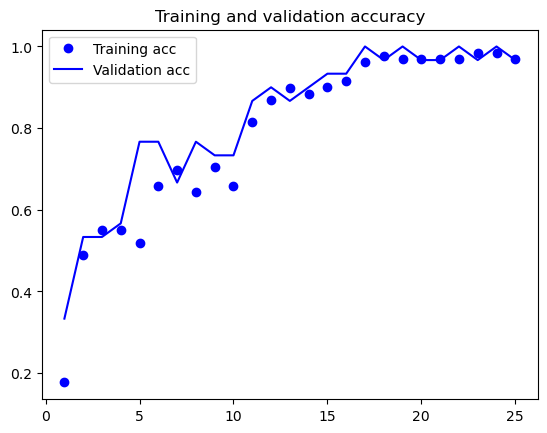

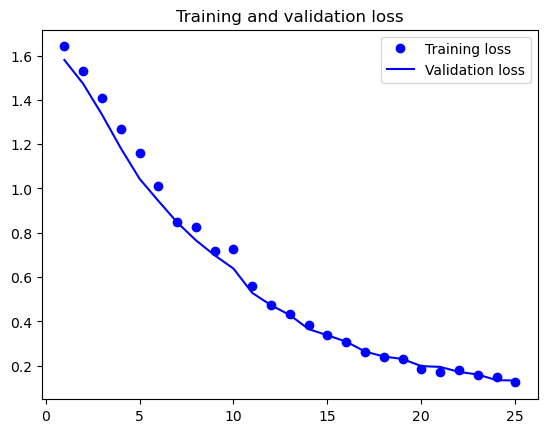

In [45]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [46]:
from keras.models import load_model
import shutil
# Loading the automatically saved model
model_reloaded = load_model(checkpoint_no + '/' + model_name)

# Saving the best model in the correct path and format
root_directory = os.getcwd()
checkpoint_dir = os.path.join(root_directory, checkpoint_no)
model_name_temp = os.path.join(checkpoint_dir, model_name + '.h5')
model_reloaded.save(model_name_temp)

# Deletion of the automatically created folder under Model Checkpoint File.
folder_name_temp = os.path.join(checkpoint_dir, model_name)
shutil.rmtree(folder_name_temp, ignore_errors=True)

C:\Users\veeri\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
best_model = load_model(model_name_temp)

In [48]:
test_loss, test_acc = best_model.evaluate(testX,
                                          testY,
                                          steps=n_test_steps)
print()
print('Test Accuracy:', test_acc)

3/3 [==============================] - 0s 7ms/step - loss: 0.2796 - accuracy: 0.8387

Test Accuracy: 0.8387096524238586


In [49]:
y_pred = model.predict(testX)
y_pred[:5]

1/1 [==============================] - 0s 72ms/step


array([[1.3465479e-04, 5.4521101e-06, 3.0397670e-04, 9.9890947e-01,
        6.4630725e-04],
       [5.1057946e-02, 6.9659755e-02, 2.1594397e-03, 3.5337009e-04,
        8.7676948e-01],
       [4.6641026e-03, 7.4389871e-05, 2.4352162e-01, 1.2927429e-03,
        7.5044715e-01],
       [4.7192423e-04, 3.1146999e-05, 9.9120662e-03, 5.7991809e-05,
        9.8952687e-01],
       [9.9204585e-04, 6.8336041e-05, 8.3300937e-03, 9.8639178e-01,
        4.2177797e-03]], dtype=float32)

In [50]:
encoder_reload = pk.load(open(checkpoint_dir + '/' + 'encoder.pkl','rb'))

In [51]:
re_transformed_y_pred = encoder_reload.inverse_transform(y_pred)
re_transformed_y_pred[:5]

array([['drugX'],
       ['drugY'],
       ['drugY'],
       ['drugY'],
       ['drugX']], dtype=object)

In [52]:
testX['re_transformed_y_pred'] = re_transformed_y_pred
testX

,Age,Na_to_K,Gender_F,Gender_M,BP_Range_HIGH,BP_Range_LOW,BP_Range_NORMAL,Fat_Range_HIGH,Fat_Range_NORMAL,re_transformed_y_pred
30,-0.446017,-0.229360,1.0,0.0,0.0,0.0,1.0,0.0,1.0,drugX
190,0.231949,0.090891,0.0,1.0,1.0,0.0,0.0,1.0,0.0,drugY
94,0.198051,-0.033444,0.0,1.0,0.0,1.0,0.0,1.0,0.0,drugY
13,0.503136,0.151902,1.0,0.0,0.0,1.0,0.0,1.0,0.0,drugY
146,-0.123983,-0.127540,1.0,0.0,0.0,1.0,0.0,0.0,1.0,drugX
170,-0.276525,-0.100240,1.0,0.0,0.0,0.0,1.0,1.0,0.0,drugX
136,0.181102,-0.159719,1.0,0.0,1.0,0.0,0.0,1.0,0.0,drugA
119,0.282797,0.293655,1.0,0.0,1.0,0.0,0.0,1.0,0.0,drugY
66,-0.259576,-0.100960,0.0,1.0,1.0,0.0,0.0,1.0,0.0,drugA
10,0.045508,-0.135014,1.0,0.0,0.0,1.0,0.0,1.0,0.0,drugC
